# **Fetal Health Analysis**

This is a dataset picked up from kaggle, and can be viewed by clicking [here](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification). It contains several features from Cardiotocograms (CTGs) of a foestus. It also contains a column titled "fetal_health" which represents the health of the foetus numbered 1: Normal, 2: Suspect, 3: Pathological. We will be going through the process of Data Analysis involving visualizations, data cleaning, data visualization, data reduction and predictive analysis to establish a link between several features in the dataset and their correlation with the health of the foetus. The dimension of the dataset provided below and the first 5 rows are made visible for further clarity.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./dataset/fetal_health.csv")
print("Shape of the Dataset:",df.shape)
print("\nTop 5 rows of the Dataset:")
print(df.head(5))

Shape of the Dataset: (2126, 22)

Top 5 rows of the Dataset:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of

## **Data Visualization**

Through visualization, let us try to find whether correlations exists and whether outliers exist. This information will be useful in our future steps.

In [3]:
import matplotlib.pyplot as plt

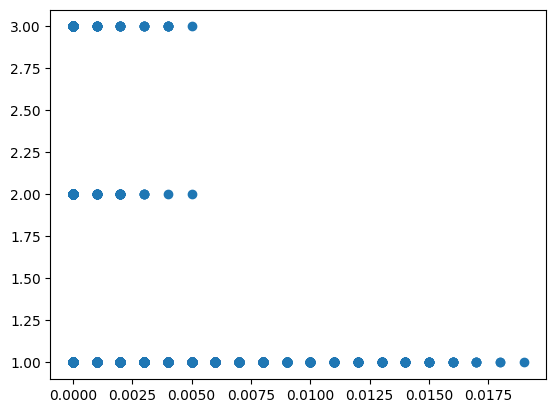

In [4]:
plt.scatter(df["accelerations"],df["fetal_health"])
plt.show()

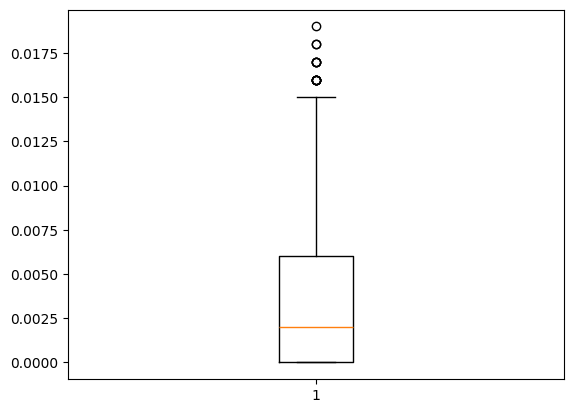

In [5]:
plt.boxplot(df["accelerations"])
plt.show()

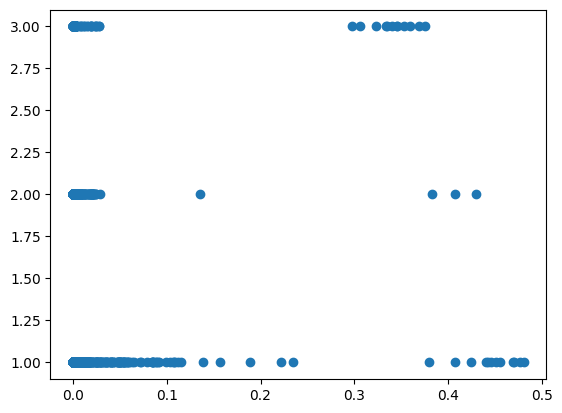

In [6]:
plt.scatter(df["fetal_movement"],df["fetal_health"])
plt.show()

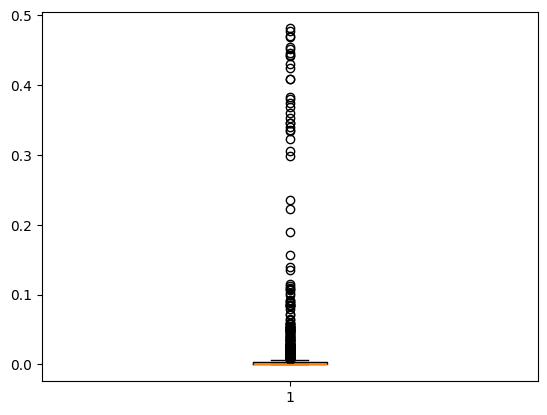

In [7]:
plt.boxplot(df["fetal_movement"])
plt.show()

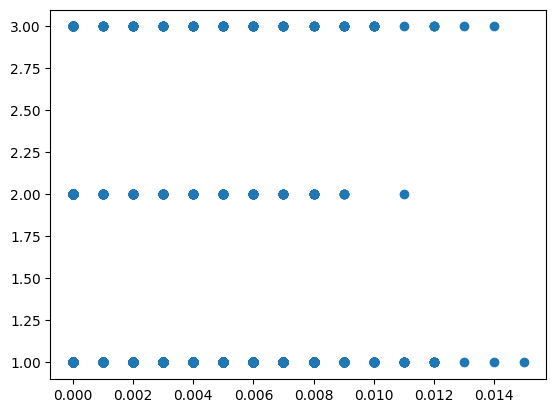

In [8]:
plt.scatter(df["uterine_contractions"],df["fetal_health"])
plt.show()

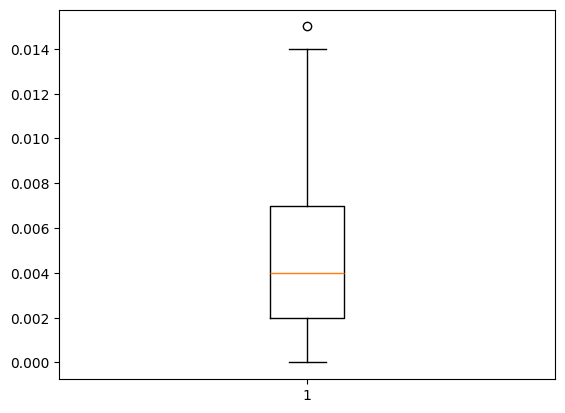

In [9]:
plt.boxplot(df["uterine_contractions"])
plt.show()

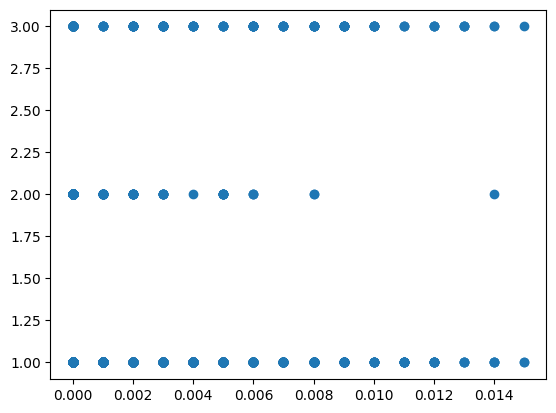

In [10]:
plt.scatter(df["light_decelerations"],df["fetal_health"])
plt.show()

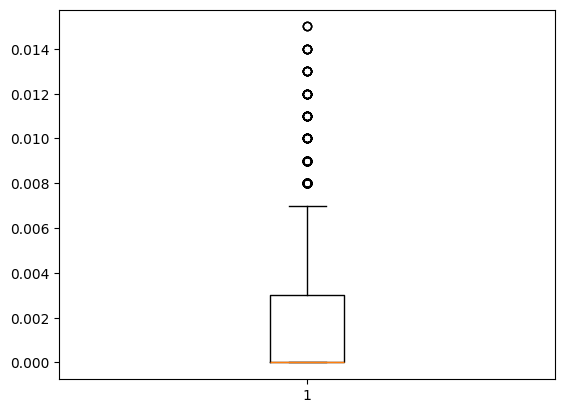

In [11]:
plt.boxplot(df["light_decelerations"])
plt.show()

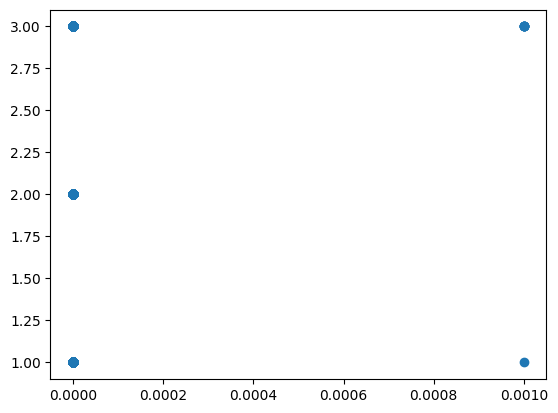

In [12]:
plt.scatter(df["severe_decelerations"],df["fetal_health"])
plt.show()

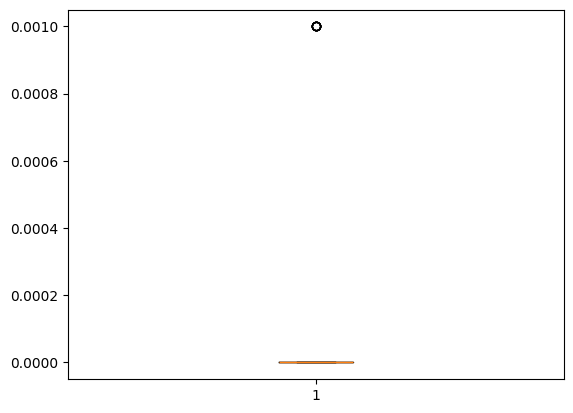

In [13]:
plt.boxplot(df["severe_decelerations"])
plt.show()

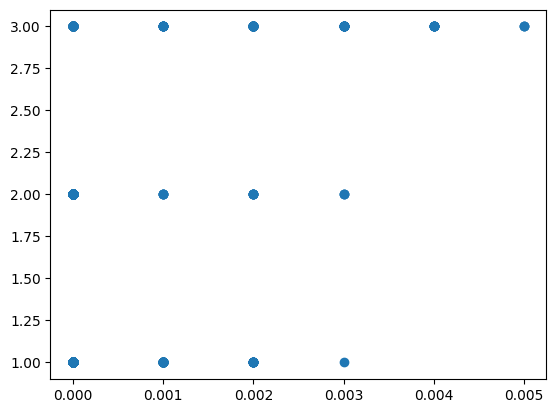

In [14]:
plt.scatter(df["prolongued_decelerations"],df["fetal_health"])
plt.show()

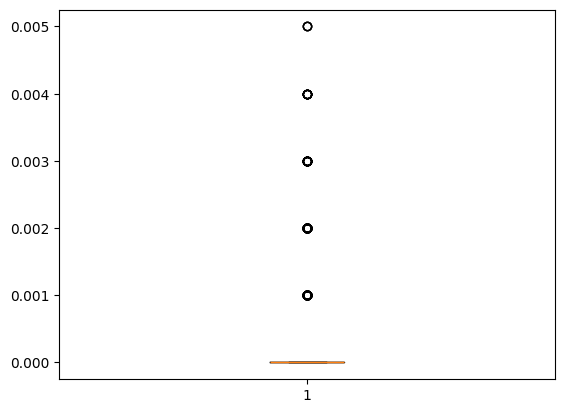

In [15]:
plt.boxplot(df["prolongued_decelerations"])
plt.show()

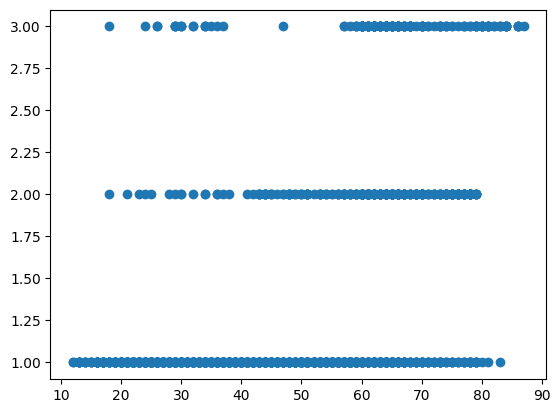

In [16]:
plt.scatter(df["abnormal_short_term_variability"],df["fetal_health"])
plt.show()

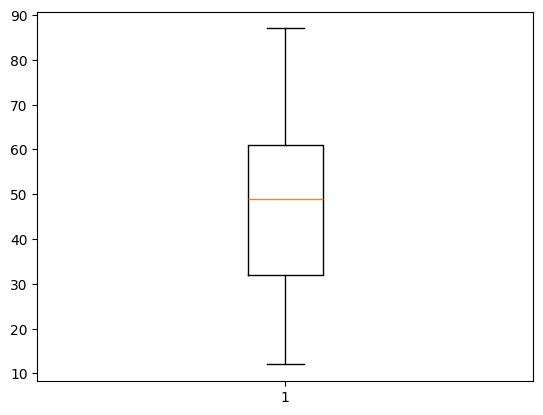

In [17]:
plt.boxplot(df["abnormal_short_term_variability"])
plt.show()

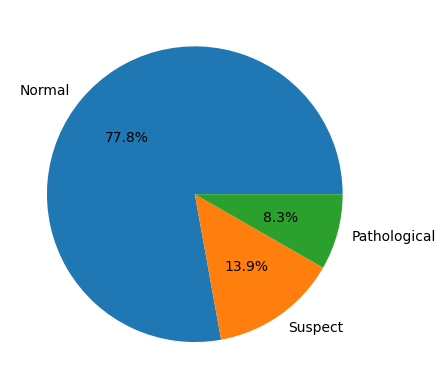

In [18]:
d = {1.0: 'Normal', 2.0: 'Suspect', 3.0: 'Pathological'}
df['class_name'] = df['fetal_health'].map(d)

diff_values=df['class_name'].value_counts()
plt.pie(diff_values,labels=diff_values.index, autopct='%1.1f%%')
plt.show()

df=df.drop('class_name',axis=1)

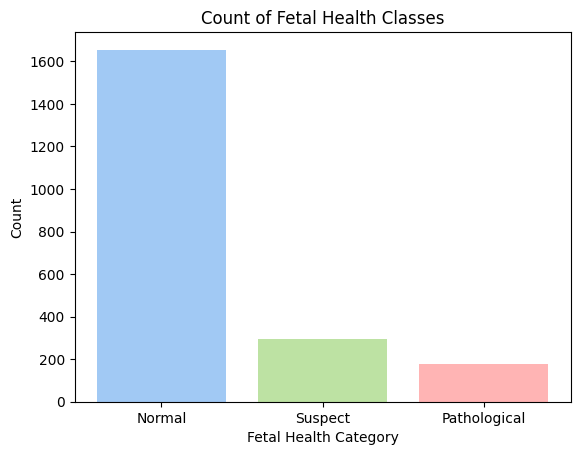

In [19]:
health_counts = df['fetal_health'].value_counts().sort_index()
plt.bar(health_counts.index, health_counts.values, color=['#A1C9F4', '#BDE2A3', '#FFB4B4'])
plt.title('Count of Fetal Health Classes')
plt.xlabel('Fetal Health Category')
plt.ylabel('Count')
plt.xticks(ticks=[1, 2, 3], labels=['Normal', 'Suspect', 'Pathological'])
plt.show()

## **Data Reduction and Data Cleaning**

### **Removing Duplicates**

In [20]:
print("-- Deduplication --")
print("Before:", df.shape)

dup_count = df.duplicated().sum()
print("Exact duplicates found:", dup_count)

# Drop exact duplicate rows across all columns
df = df.drop_duplicates().reset_index(drop=True)

print("After :", df.shape)
print("Rows removed:", dup_count)



-- Deduplication --
Before: (2126, 22)
Exact duplicates found: 13
After : (2113, 22)
Rows removed: 13


### **Data Cleaning**

In [21]:
print("Before:", list(df.columns))

fixes = {}
# Misspelling → correct
if "prolongued_decelerations" in df.columns:
    fixes["prolongued_decelerations"] = "prolonged_decelerations"

# Space → underscore (nicer to code with)
if "baseline value" in df.columns:
    fixes["baseline value"] = "baseline_value"

# Optional spelling preference
if "histogram_number_of_zeroes" in df.columns:
    fixes["histogram_number_of_zeroes"] = "histogram_number_of_zeros"

# Apply if anything to change
if fixes:
    df = df.rename(columns=fixes)
else:
    print("No known messy columns found — nothing to change.")

print("After :", list(df.columns))


Before: ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']
After : ['baseline_value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolonged_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zero

### **Handling Outliers**

The outliers that we detected in our visualizations can be removed through a similar process. We first create Quartiles for each column and then we determine the max and min values through IQR. Finally we replace outliers by the mean of inliers.

In [22]:
import numpy as np

label_col = ["fetal_health","severe_decelerations","fetal_movement","prolonged_decelerations"]
feature_cols = [c for c in df.columns if c not in label_col and pd.api.types.is_numeric_dtype(df[c])]

# IQR bounds
q1 = df[feature_cols].quantile(0.25)
q3 = df[feature_cols].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

total_replaced = 0
replaced_per_col = {}

for col in feature_cols:
    mask_out = ~df[col].between(low[col], high[col])
    inliers = df.loc[~mask_out, col]
    if len(inliers) > 0:
        repl = inliers.mean()
    else:
        repl = df[col].mean()

    n_out = int(mask_out.sum())
    if n_out > 0:
        df.loc[mask_out, col] = repl
        total_replaced += n_out
        replaced_per_col[col] = n_out

print("Outlier replacement complete.")
print("Total values replaced:", total_replaced)
if replaced_per_col:
    print("Per-column replacements:")
    for k, v in replaced_per_col.items():
        print(f"  {k}: {v}")


Outlier replacement complete.
Total values replaced: 1486
Per-column replacements:
  accelerations: 14
  uterine_contractions: 1
  light_decelerations: 150
  mean_value_of_short_term_variability: 70
  percentage_of_time_with_abnormal_long_term_variability: 305
  mean_value_of_long_term_variability: 71
  histogram_max: 24
  histogram_number_of_peaks: 19
  histogram_number_of_zeros: 502
  histogram_mode: 73
  histogram_mean: 45
  histogram_median: 28
  histogram_variance: 184



### **Backward Attribute Subset Elimination**

Let us evaluate the strength of the correlation between different variables for further reduction in the number of attributes. For this, we will be using Pearson's Coefficient Test.

In [23]:
col1=df['histogram_mean']
col2=df['baseline_value']
resultDF=(col1-col1.mean())*(col2-col2.mean())
r=resultDF.sum()/((len(col1)-1)*col1.std()*col2.std())
print(r)

0.7411457936120648


In [24]:
col1=df['histogram_mean']
col2=df['histogram_median']
resultDF=(col1-col1.mean())*(col2-col2.mean())
r=resultDF.sum()/((len(col1)-1)*col1.std()*col2.std())
print(r)

0.911563688747682


In [25]:
col1=df['histogram_mean']
col2=df['histogram_mode']
resultDF=(col1-col1.mean())*(col2-col2.mean())
r=resultDF.sum()/((len(col1)-1)*col1.std()*col2.std())
print(r)

0.8065833243410558


In this step, we remove redundant data and data that is closely correlated as proven above so that our model can be trained relatively faster.

In [26]:
# Data Reduction by Attribute Subset Selection
print("-- Before Subset Selection --")
print(list(df.columns))
df=df.drop(['histogram_number_of_peaks','histogram_number_of_zeros','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency','histogram_max','histogram_width','histogram_min','abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability'],axis=1)
print("-- After Subset Selection --")
print(list(df.columns))
print("Number of Columns after Attribute Subset Selection",len(df.columns))

-- Before Subset Selection --
['baseline_value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolonged_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeros', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']
-- After Subset Selection --
['baseline_value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolonged_decelerations', 'mean_value_of_short_term_variability', 'mean_value_of_long_term_variability', 'fetal_health']
Number of Columns after Attribute Subset Selection 10


## **Normalizing Data**

Since SoftMax works for 0 indexed classes, we must subtract 1 from each row for the fetal health column to get the desired inputs for suitable outputs.

In [27]:
df['fetal_health']=df['fetal_health']-1.0

We will use min-max normalization (new min = 0, new max = 1) for every column in the dataset. This is because, at this stage we have already removed outliers.

In [28]:
print("-- Scaling Data --")
cols_to_drop = []
for col in df.columns[:-1]:
    if df[col].max() == df[col].min():
        cols_to_drop.append(col)

df.drop(cols_to_drop, axis=1, inplace=True)

for col in df.columns[:-1]:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min()) # Formula for min-max normalization

print("After scaling and dropping:")
print(df.head(),"\n",df.shape)

-- Scaling Data --
After scaling and dropping:
   baseline_value  accelerations  fetal_movement  uterine_contractions  \
0        0.259259       0.000000             0.0              0.000000   
1        0.481481       0.400000             0.0              0.428571   
2        0.500000       0.200000             0.0              0.571429   
3        0.518519       0.200000             0.0              0.571429   
4        0.481481       0.466667             0.0              0.571429   

   light_decelerations  severe_decelerations  prolonged_decelerations  \
0             0.000000                   0.0                      0.0   
1             0.428571                   0.0                      0.0   
2             0.428571                   0.0                      0.0   
3             0.428571                   0.0                      0.0   
4             0.000000                   0.0                      0.0   

   mean_value_of_short_term_variability  mean_value_of_long_term_vari

## **Hypothesis Testing**

Considering two features - fetal health and prolonged decelerations - from our dataset. Let us try and evaluate the correlation between these two variables through hypothesis testing to quantify how much does the variable "prolonged_decelerations" effect the result variable.

Null Hypothesis (H0​): The mean value of prolonged_decelerations is the same across all three fetal_health groups (Normal, Suspect, and Pathological).

Alternative Hypothesis (H1​): The mean value of prolonged_decelerations is different for at least one fetal_health group.

We will be using ANOVA test to establish whether a correlation between these two variables exists.

In [29]:
from scipy.stats import f_oneway

ModuleNotFoundError: No module named 'scipy'

In [ ]:
normal_group = df[df['fetal_health'] == 0]['prolonged_decelerations']
suspect_group = df[df['fetal_health'] == 1]['prolonged_decelerations']
pathological_group = df[df['fetal_health'] == 2]['prolonged_decelerations']

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(normal_group, suspect_group, pathological_group)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("There is a statistically significant difference in the mean of 'prolonged_decelerations' across the fetal health groups.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a significant difference in means.")

## **Predictive Analysis using Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [ ]:
torch.manual_seed(42)
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, features, labels): # x and y as features and labels respectively
        self.features=torch.tensor(features,dtype=torch.float32)
        self.labels=torch.tensor(labels,dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self,index):
        return self.features[index],self.labels[index]

# Creating the dataset objects
train_dataset=CustomDataset(x_train,y_train)
test_dataset=CustomDataset(x_test,y_test)
# train_dataset[i] will give you the ith row

# Creating Dataloader Objects
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)


In [ ]:
# Creating the Neural Network Class and Defining the Training Loop
class myNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(num_features,7),
            nn.ReLU(),
            nn.Linear(7,12),
            nn.ReLU(),
            nn.Linear(12,3) # softmax is by default implemented in pytorch when using CrossEntropyLoss Criterion function
        )
    def forward(self,x):
        return self.model(x)

In [ ]:
# The Training Phase
epochs=180
lr=0.1
model=myNN(len(x_train[1]))
criterion=nn.CrossEntropyLoss()
# Using Gradient Descent
optimizer=optim.SGD(model.parameters(),lr=lr)
# Training Loop
for epoch in range(epochs):
    total_epoch_loss=0
    for batch_features,batch_labels in train_loader:
        # forward pass
        outputs=model(batch_features)
        # calculating loss
        loss=criterion(outputs, batch_labels)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update grads
        optimizer.step()

        total_epoch_loss+=loss.item()
    print(f"Loss associated with epoch {epoch}: {total_epoch_loss/len(train_loader)}")

In [ ]:
model.eval()
# Evaluation Code
total=0
correct=0
with torch.no_grad():
    for batch_features,batch_labels in test_loader:
        outputs=model(batch_features) # Probabilistic values (a tensor) of each batches contained in another tensor
        _,predicted_labels=torch.max(outputs,1) # What are labels corresponding to max probability
        total+=len(batch_features)
        for i in range(len(batch_labels)):
            if batch_labels[i]==predicted_labels[i]:
                correct+=1
print("Accuracy: ",correct/total)

## **Summary and Conclusion**

Through this dataset, we have explored several aspects of data analysis such as Data Cleaning, Data Reduction, Data Normalization, Predictive Analysis and Hypothesis Testing. The model hence created should be able to classify the foetus as Normal, Suspect and Pathological with 88.8% accuracy based on several attributes of Cardiotocograms (CTGs).